**Introduction**





**Research question**




**Data Description**



**Methods and Results**

In [1]:
library(tidyverse)
library(tidymodels)
library(tidyclust)
library(forcats)
library(repr)
source("cleanup.R")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [14]:
game_data <- read_csv("project_data/players.csv")
head(game_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [13]:
game_data_select <- game_data |>
    select(experience, subscribe)
game_data_converted <- game_data_select |>
    mutate(experience = case_when(experience == "Pro" ~ 5, experience == "Veteran" ~ 4, experience == "Regular" ~ 3,
                                 experience == "Amateur" ~ 2, experience == "Beginner" ~ 1))

game_data_converted$subscribe <- as.factor(as.integer(game_data_converted$subscribe))
head(game_data_converted)



experience,subscribe
<dbl>,<fct>
5,1
4,1
4,0
2,1
3,1
2,1


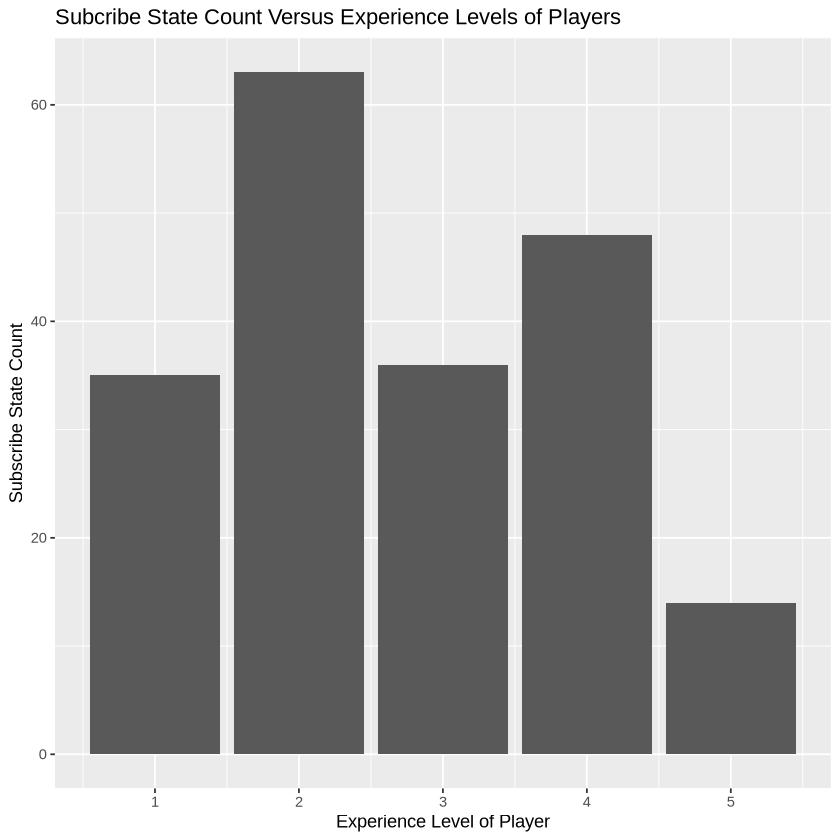

In [11]:
game_data_graph <- game_data_converted |>
    ggplot(aes(x = experience)) +
    geom_bar() +
    xlab("Experience Level of Player") +
    ylab("Subscribe State Count") +
    ggtitle("Subcribe State Count Versus Experience Levels of Players")


game_data_graph

In [12]:
game_data_2 <- game_data |>
    select(experience, subscribe, played_hours)
head(game_data_2)



experience,subscribe,played_hours
<chr>,<lgl>,<dbl>
Pro,TRUE,30.3
Veteran,TRUE,3.8
Veteran,FALSE,0.0
Amateur,TRUE,0.7
Regular,TRUE,0.1
Amateur,TRUE,0.0


In [15]:
players_data <- game_data_2 |>
    group_by(experience, subscribe) |>
    summarize(mean_hours = mean(played_hours))
head(players_data)

`summarise()` has grouped output by 'experience'. You can override using the
`.groups` argument.


experience,subscribe,mean_hours
<chr>,<lgl>,<dbl>
Amateur,FALSE,0.3666667
Amateur,TRUE,8.2777778
Beginner,FALSE,1.1750000
Beginner,TRUE,1.2703704
Pro,FALSE,0.5750000
Pro,TRUE,3.4100000


In [ ]:
player_data_plot <- 